# Airline Passenger Problem Description

Objective: how to develop a neural network model for a time series prediction problem using the Keras deep learning library.

1. About the airline passengers(in thousands)univariate time series prediction problem.
2. How to phrase time series prediction as a regression problem and develop a neural network model for it.
3. How to frame time series prediction with a time lag and develop a neural network model for it.

In [1]:
import pandas
import matplotlib.pyplot as plt
# We are not interested in the date. Exclude the first column.
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

<Figure size 640x480 with 1 Axes>

# The Time Series Prediction 
### Multipayer Perceptron Regression
given the number of passengers (in units of thousands) this month, what is the number of passengers next month.

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
# floating point - more suitable for modeling with a neural network.
dataset = dataset.astype('float32')

## Cross Validation for a Normal Classification or Regression Problem 

In [4]:
# split the ordered dataset into train and test datasets
# For training model, 67% of the observations and 33% remaining
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [5]:
# convert an array of values into a dataset matrix
# x is the number of passengers at a given time(t) and Y is the number of passengers at the next time(t+1)
# look_back: the number of previous time steps to use a input variables to predict the next time period
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# reshape train and test datasets into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# create and fit Multilayer Perceptron model to the training data
# The model is fit using mean squared error, which if we take the square root gives us an error score in the units of the dataset.

model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)







Epoch 1/200
 - 1s - loss: 57835.8588
Epoch 2/200
 - 0s - loss: 45969.6608
Epoch 3/200
 - 0s - loss: 35446.3753
Epoch 4/200
 - 0s - loss: 26265.4319
Epoch 5/200
 - 0s - loss: 18281.9936
Epoch 6/200
 - 0s - loss: 11719.2127
Epoch 7/200
 - 0s - loss: 7018.2484
Epoch 8/200
 - 0s - loss: 3862.7271
Epoch 9/200
 - 0s - loss: 2059.5976
Epoch 10/200
 - 0s - loss: 1157.0768
Epoch 11/200
 - 0s - loss: 759.5936
Epoch 12/200
 - 0s - loss: 611.7703
Epoch 13/200
 - 0s - loss: 560.0393
Epoch 14/200
 - 0s - loss: 544.5196
Epoch 15/200
 - 0s - loss: 544.4840
Epoch 16/200
 - 0s - loss: 542.3486
Epoch 17/200
 - 0s - loss: 535.3117
Epoch 18/200
 - 0s - loss: 538.6701
Epoch 19/200
 - 0s - loss: 545.5836
Epoch 20/200
 - 0s - loss: 541.5914
Epoch 21/200
 - 0s - loss: 537.2691
Epoch 22/200
 - 0s - loss: 539.1680
Epoch 23/200
 - 0s - loss: 536.6054
Epoch 24/200
 - 0s - loss: 535.2381
Epoch 25/200
 - 0s - loss: 538.6712
Epoch 26/200
 - 0s - loss: 538.8288
Epoch 27/200
 - 0s - loss: 541.2104
Epoch 28/200
 -

Epoch 194/200
 - 0s - loss: 541.1526
Epoch 195/200
 - 0s - loss: 547.6871
Epoch 196/200
 - 0s - loss: 559.0254
Epoch 197/200
 - 0s - loss: 542.8338
Epoch 198/200
 - 0s - loss: 531.5480
Epoch 199/200
 - 0s - loss: 549.2898
Epoch 200/200
 - 0s - loss: 539.2435


In [8]:
import math
# Estimate model performance on the train and test datasets, which give us a point of comparison for new models.
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.61 MSE (23.06 RMSE)
Test Score: 2354.55 MSE (48.52 RMSE)


# Shifting predictions so that they aline on the x-axis with the original dataset
### In the plot, Blue: the original dataset, Orange: the predictions for the train dataset, Green: predictions on the unseen test dataset red.

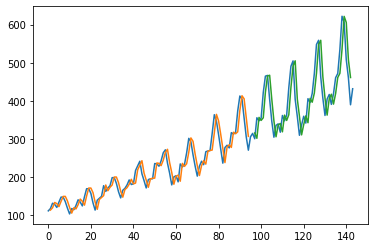

In [9]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()